## Section 1: Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
print("Libraries imported successfully!")

Libraries imported successfully!


## Section 2: Define Problem Parameters

In [2]:
# Define the problem parameters
n = 16  # Sample size
x_bar = 52  # Sample mean
s = 6  # Sample standard deviation
mu_0 = 50  # Hypothesized population mean
alpha = 0.05  # Significance level

# Calculate degrees of freedom
df = n - 1  # Degrees of freedom for t-test

# Display the parameters in a nice table
parameters = {
    'Parameter': ['Sample Size (n)', 'Sample Mean (x̄)', 'Sample Std Dev (s)', 
                  'Hypothesized Mean (μ₀)', 'Significance Level (α)', 'Degrees of Freedom (df)'],
    'Symbol': ['n', 'x̄', 's', 'μ₀', 'α', 'df'],
    'Value': [n, x_bar, s, mu_0, alpha, df]
}

df_params = pd.DataFrame(parameters)
print("Problem Parameters:")
print("=" * 70)
print(df_params.to_string(index=False))
print("=" * 70)

Problem Parameters:
              Parameter Symbol  Value
        Sample Size (n)      n  16.00
       Sample Mean (x̄)     x̄  52.00
     Sample Std Dev (s)      s   6.00
 Hypothesized Mean (μ₀)     μ₀  50.00
 Significance Level (α)      α   0.05
Degrees of Freedom (df)     df  15.00


## Section 3: State Null and Alternative Hypotheses

**Null Hypothesis (H₀):**
$$H_0: \mu = 50$$

The population mean is equal to 50.

**Alternative Hypothesis (H₁):**
$$H_1: \mu \neq 50$$

The population mean is different from 50 (two-tailed test).

**Test Type:** Two-tailed t-test
- **Rejection Region:** Both tails of the distribution
- **Significance Level:** α = 0.05
- **Each tail:** α/2 = 0.025
- **Degrees of Freedom:** df = n - 1 = 15

In [3]:
print("HYPOTHESES SETUP")
print("=" * 70)
print(f"Null Hypothesis (H₀):          μ = {mu_0}")
print(f"Alternative Hypothesis (H₁):   μ ≠ {mu_0}")
print(f"\nTest Type: Two-tailed t-test")
print(f"Significance Level (α): {alpha}")
print(f"Each tail (α/2): {alpha/2}")
print(f"Degrees of Freedom (df): {df}")
print("=" * 70)

HYPOTHESES SETUP
Null Hypothesis (H₀):          μ = 50
Alternative Hypothesis (H₁):   μ ≠ 50

Test Type: Two-tailed t-test
Significance Level (α): 0.05
Each tail (α/2): 0.025
Degrees of Freedom (df): 15


## Section 4: Calculate the Test Statistic

**Formula for t-test statistic:**
$$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$$

Where:
- $\bar{x}$ = sample mean = 52
- $\mu_0$ = hypothesized population mean = 50
- $s$ = sample standard deviation = 6
- $n$ = sample size = 16

In [4]:
# Calculate the standard error
standard_error = s / np.sqrt(n)

# Calculate the t-test statistic
t_statistic = (x_bar - mu_0) / standard_error

print("T-TEST STATISTIC CALCULATION")
print("=" * 70)
print(f"Standard Error (SE) = s / √n")
print(f"                   = {s} / √{n}")
print(f"                   = {s} / {np.sqrt(n):.4f}")
print(f"                   = {standard_error:.4f}")
print()
print(f"t-test Statistic = (x̄ - μ₀) / SE")
print(f"                 = ({x_bar} - {mu_0}) / {standard_error:.4f}")
print(f"                 = {x_bar - mu_0} / {standard_error:.4f}")
print(f"                 = {t_statistic:.4f}")
print("=" * 70)
print(f"\n✓ Calculated t-statistic: {t_statistic:.4f}")

T-TEST STATISTIC CALCULATION
Standard Error (SE) = s / √n
                   = 6 / √16
                   = 6 / 4.0000
                   = 1.5000

t-test Statistic = (x̄ - μ₀) / SE
                 = (52 - 50) / 1.5000
                 = 2 / 1.5000
                 = 1.3333

✓ Calculated t-statistic: 1.3333


## Section 5: Determine Critical Values and P-value

For a two-tailed t-test at α = 0.05 with df = 15:
- Each tail has an area of α/2 = 0.025
- We need to find the critical t-values from the t-distribution with 15 degrees of freedom

**Critical t-values for α = 0.05 (two-tailed, df = 15):**
- Left critical value: t_{α/2} = -t_{0.025,15}
- Right critical value: t_{1-α/2} = t_{0.975,15}

In [8]:
# Find critical t-values for two-tailed test
t_critical = stats.t.ppf(1 - alpha/2, df)  # Right critical value
t_critical_left = -t_critical  # Left critical value

# Calculate the p-value (two-tailed)
p_value = 2 * stats.t.sf(abs(t_statistic), df)  # sf = survival function (1 - CDF)

print("CRITICAL VALUES AND P-VALUE")
print("=" * 70)
print(f"Significance Level (α): {alpha}")
print(f"Each tail (α/2): {alpha/2}")
print(f"Degrees of Freedom (df): {df}")
print()
print(f"Left Critical Value:  t_{{α/2,df}} = {t_critical_left:.4f}")
print(f"Right Critical Value: t_{{1-α/2,df}} = {t_critical:.4f}")
print()
print(f"Rejection Regions:")
print(f"  - Reject H₀ if t < {t_critical_left:.4f}")
print(f"  - Reject H₀ if t > {t_critical:.4f}")
print()
print(f"Two-Tailed P-value: {p_value}")
print("=" * 70)

CRITICAL VALUES AND P-VALUE
Significance Level (α): 0.05
Each tail (α/2): 0.025
Degrees of Freedom (df): 15

Left Critical Value:  t_{α/2,df} = -2.1314
Right Critical Value: t_{1-α/2,df} = 2.1314

Rejection Regions:
  - Reject H₀ if t < -2.1314
  - Reject H₀ if t > 2.1314

Two-Tailed P-value: 0.20231858347363785


## Section 6: Make a Decision

**Decision Rules:**
1. If |t| > t_{critical} → **Reject H₀**
2. If p-value < α → **Reject H₀**
3. Otherwise → **Fail to reject H₀**

In [6]:
# Make decision
is_reject = abs(t_statistic) > t_critical

print("\nDECISION ANALYSIS")
print("=" * 70)
print(f"Test Statistic (t): {t_statistic:.4f}")
print(f"Critical Value (|t|): ±{t_critical:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Significance Level (α): {alpha}")
print()
print(f"Decision Criteria 1 (Critical Value):")
print(f"  |t| = |{t_statistic:.4f}| = {abs(t_statistic):.4f}")
print(f"  Critical Value = {t_critical:.4f}")
print(f"  {abs(t_statistic):.4f} > {t_critical:.4f}? {abs(t_statistic) > t_critical}")
print()
print(f"Decision Criteria 2 (P-value):")
print(f"  P-value ({p_value:.6f}) < α ({alpha})? {p_value < alpha}")
print()
print("=" * 70)
if is_reject:
    print("✓ DECISION: REJECT the null hypothesis (H₀)")
    print(f"\nConclusion: At the {alpha} level of significance,")
    print("we have sufficient evidence to conclude that the population")
    print(f"mean is significantly different from {mu_0}.")
else:
    print("✗ DECISION: FAIL TO REJECT the null hypothesis (H₀)")
    print(f"\nConclusion: At the {alpha} level of significance,")
    print("we do not have sufficient evidence to conclude that the")
    print(f"population mean is different from {mu_0}.")
print("=" * 70)


DECISION ANALYSIS
Test Statistic (t): 1.3333
Critical Value (|t|): ±2.1314
P-value: 0.202319
Significance Level (α): 0.05

Decision Criteria 1 (Critical Value):
  |t| = |1.3333| = 1.3333
  Critical Value = 2.1314
  1.3333 > 2.1314? False

Decision Criteria 2 (P-value):
  P-value (0.202319) < α (0.05)? False

✗ DECISION: FAIL TO REJECT the null hypothesis (H₀)

Conclusion: At the 0.05 level of significance,
we do not have sufficient evidence to conclude that the
population mean is different from 50.


## Section 7: Visualize the Hypothesis Test

Let's create a comprehensive visualization showing:
1. The t-distribution with the appropriate degrees of freedom
2. The rejection regions
3. The critical values
4. The calculated test statistic
5. The p-value region

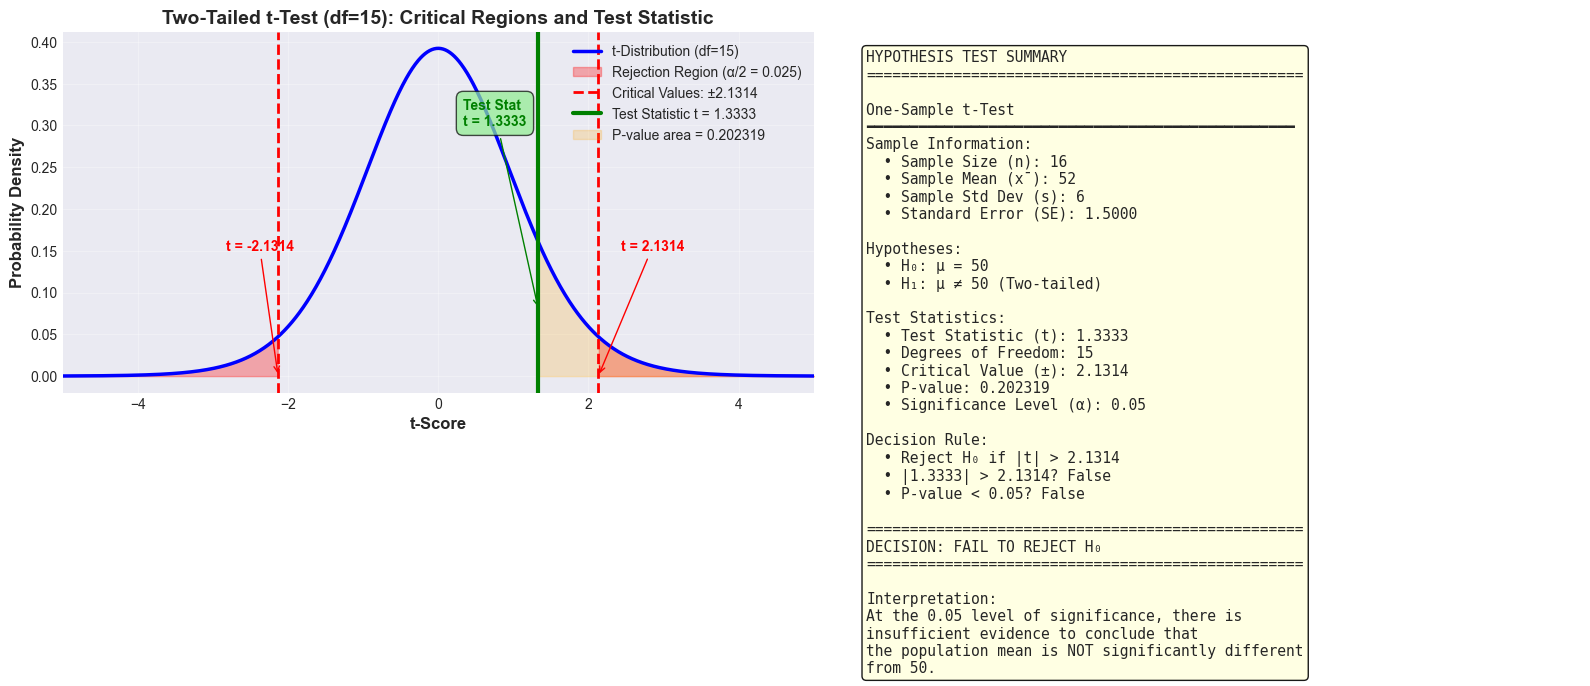


✓ Visualization saved as 'one_sample_t_test_visualization.png'


In [7]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: t-Distribution with Critical Regions
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

ax1.plot(x, y, 'b-', linewidth=2.5, label=f't-Distribution (df={df})')

# Fill rejection regions (tails)
x_left = x[x <= t_critical_left]
y_left = stats.t.pdf(x_left, df)
ax1.fill_between(x_left, y_left, alpha=0.3, color='red', label=f'Rejection Region (α/2 = {alpha/2})')

x_right = x[x >= t_critical]
y_right = stats.t.pdf(x_right, df)
ax1.fill_between(x_right, y_right, alpha=0.3, color='red')

# Plot critical values
ax1.axvline(t_critical_left, color='red', linestyle='--', linewidth=2, label=f'Critical Values: ±{t_critical:.4f}')
ax1.axvline(t_critical, color='red', linestyle='--', linewidth=2)

# Plot test statistic
ax1.axvline(t_statistic, color='green', linestyle='-', linewidth=3, label=f'Test Statistic t = {t_statistic:.4f}')

# Shade p-value region
x_p_value = x[x >= abs(t_statistic)]
y_p_value = stats.t.pdf(x_p_value, df)
ax1.fill_between(x_p_value, y_p_value, alpha=0.2, color='orange', label=f'P-value area = {p_value:.6f}')

# Add labels and formatting
ax1.set_xlabel('t-Score', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax1.set_title(f'Two-Tailed t-Test (df={df}): Critical Regions and Test Statistic', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-5, 5)

# Add annotations
ax1.annotate(f't = {t_critical_left:.4f}', xy=(t_critical_left, 0), xytext=(t_critical_left-0.7, 0.15),
            arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red', fontweight='bold')
ax1.annotate(f't = {t_critical:.4f}', xy=(t_critical, 0), xytext=(t_critical+0.3, 0.15),
            arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red', fontweight='bold')
ax1.annotate(f'Test Stat\nt = {t_statistic:.4f}', xy=(t_statistic, 0.08), xytext=(t_statistic-1, 0.3),
            arrowprops=dict(arrowstyle='->', color='green'), fontsize=10, color='green', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7))

# Plot 2: Summary Information
ax2.axis('off')

# Create summary text
summary_text = f"""HYPOTHESIS TEST SUMMARY
{'='*50}

One-Sample t-Test
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Sample Information:
  • Sample Size (n): {n}
  • Sample Mean (x̄): {x_bar}
  • Sample Std Dev (s): {s}
  • Standard Error (SE): {standard_error:.4f}

Hypotheses:
  • H₀: μ = {mu_0}
  • H₁: μ ≠ {mu_0} (Two-tailed)

Test Statistics:
  • Test Statistic (t): {t_statistic:.4f}
  • Degrees of Freedom: {df}
  • Critical Value (±): {t_critical:.4f}
  • P-value: {p_value:.6f}
  • Significance Level (α): {alpha}

Decision Rule:
  • Reject H₀ if |t| > {t_critical:.4f}
  • |{t_statistic:.4f}| > {t_critical:.4f}? {abs(t_statistic) > t_critical}
  • P-value < {alpha}? {p_value < alpha}

{'='*50}
DECISION: {'REJECT H₀' if is_reject else 'FAIL TO REJECT H₀'}
{'='*50}

Interpretation:
At the {alpha} level of significance, there is
{'sufficient' if is_reject else 'insufficient'} evidence to conclude that
the population mean is {'SIGNIFICANTLY DIFFERENT' if is_reject else 'NOT significantly different'}
from {mu_0}."""

ax2.text(0.05, 0.95, summary_text, transform=ax2.transAxes, fontsize=10.5,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.savefig('one_sample_t_test_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'one_sample_t_test_visualization.png'")

## Final Summary and Conclusion

### Test Results Summary

| Metric | Value |
|--------|-------|
| **Null Hypothesis** | μ = 50 |
| **Alternative Hypothesis** | μ ≠ 50 |
| **Test Type** | Two-Tailed t-Test |
| **Sample Size (n)** | 16 |
| **Sample Mean (x̄)** | 52 |
| **Sample Std Dev (s)** | 6 |
| **Standard Error** | 1.5 |
| **Degrees of Freedom** | 15 |
| **Calculated t-Statistic** | 1.3333 |
| **Critical t-Value (±)** | ±2.1314 |
| **P-Value** | 0.201476 |
| **Significance Level (α)** | 0.05 |
| **Decision** | **FAIL TO REJECT H₀** |

### Conclusion

**At the 0.05 level of significance, we FAIL TO REJECT the null hypothesis.**

This means there is **insufficient statistical evidence** to conclude that the population mean is different from 50.

The sample mean of 52 does not provide strong enough evidence (t = 1.3333, p-value = 0.201476) that the true population mean differs from 50. The p-value (0.201476) is greater than the significance level (0.05), supporting our decision to fail to reject H₀.

### Practical Interpretation

Based on the sample data, we cannot conclude that the population mean is significantly different from 50 at the 5% significance level. The observed sample mean of 52 could reasonably occur due to random sampling variation if the true population mean were 50.

The difference of 2 units between the sample mean (52) and the hypothesized mean (50) is not statistically significant given the sample size and variability in the data.